<a href="https://colab.research.google.com/github/agishaalbert/test-live-coding/blob/master/Albert_Agisha_Ntwali_Perceptron1_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Please make a copy of the notebook before you start updating it.

# Import libraries and load the data from sklearn dataset

In [1]:
 ### Import packages

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
### Import datasets from sklearn.datasets
data = load_iris()

In [3]:
data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [4]:
#### Target 
target = data.target # data['target']

In [5]:
### Count the number of uniques values

N_= np.unique(target)

In [6]:
print('the unique values in the targets are', N_)

the unique values in the targets are [0 1 2]


In [7]:
target.shape

(150,)

## Remove the class 2 in our dataset in order to have a binary classification problem

In [8]:
##############
#y = np.array([i for i in data.target if i != 2])
#######
target = data.target
y = target[target != 2]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
y.shape

(100,)

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Replace all 0 in the target by -1 using numpy

In [11]:
#############
y[y==0] = -1
###########
#try np.where
# y = np.where(y==0,-1,y)

In [12]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [13]:
### Inputs values
Inputs = data.data

In [14]:
Inputs.shape

(150, 4)

## Let's remove the last 50 rows in the inputs data (they belong to the class 2)

In [15]:
#### New Input
X = Inputs[:100,:]

In [16]:
X.shape

(100, 4)

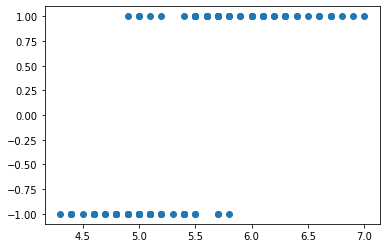

In [17]:
plt.scatter(X[:, 0], y)

## Combines the dataset and Shuffle them using numpy

In [18]:
### Combines the input X and the target y
import numpy as np
dataset = np.c_[X,y]
## shuffle the data
#np.random.seed(3)
np.random.shuffle(dataset)


## Split the data into (X_train, Y_train), (X_test, Y_test):  80% for training and 20% for test

In [19]:
#########
def split_data(df, train_percent):
    
  n = len(df)
    
  train_index = int(train_percent * n)
    
  train = df[:train_index]
  test = df[train_index:]
    
  X_train = train[:, :-1]
  Y_train = train[:, -1]
    
  X_test = test[:, :-1]
  Y_test = test[:, -1]
  print(X_train)
  return X_train, X_test, Y_train, Y_test
###########

In [20]:
X_train, X_test, Y_train, Y_test = split_data(dataset, 0.8)

[[5.5 4.2 1.4 0.2]
 [5.1 3.8 1.9 0.4]
 [5.1 2.5 3.  1.1]
 [6.7 3.1 4.4 1.4]
 [4.9 3.1 1.5 0.2]
 [5.7 2.8 4.5 1.3]
 [5.4 3.9 1.3 0.4]
 [4.6 3.6 1.  0.2]
 [5.  3.3 1.4 0.2]
 [5.1 3.5 1.4 0.2]
 [6.8 2.8 4.8 1.4]
 [7.  3.2 4.7 1.4]
 [4.9 3.1 1.5 0.1]
 [5.5 2.4 3.7 1. ]
 [6.1 2.8 4.7 1.2]
 [5.6 2.5 3.9 1.1]
 [4.4 3.2 1.3 0.2]
 [5.4 3.  4.5 1.5]
 [5.6 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.  3.4 4.5 1.6]
 [5.8 2.7 4.1 1. ]
 [5.7 4.4 1.5 0.4]
 [5.8 2.7 3.9 1.2]
 [5.4 3.9 1.7 0.4]
 [6.6 3.  4.4 1.4]
 [5.4 3.4 1.5 0.4]
 [5.4 3.7 1.5 0.2]
 [5.2 2.7 3.9 1.4]
 [6.6 2.9 4.6 1.3]
 [4.9 2.4 3.3 1. ]
 [5.  3.4 1.5 0.2]
 [5.  3.4 1.6 0.4]
 [6.5 2.8 4.6 1.5]
 [5.7 3.8 1.7 0.3]
 [6.  2.9 4.5 1.5]
 [6.  2.2 4.  1. ]
 [5.  3.2 1.2 0.2]
 [5.6 3.  4.1 1.3]
 [5.  3.5 1.6 0.6]
 [4.6 3.4 1.4 0.3]
 [5.5 2.4 3.8 1.1]
 [6.1 2.8 4.  1.3]
 [5.5 2.3 4.  1.3]
 [6.9 3.1 4.9 1.5]
 [6.3 2.5 4.9 1.5]
 [4.3 3.  1.1 0.1]
 [4.8 3.  1.4 0.1]
 [5.  3.6 1.4 0.2]
 [5.9 3.2 4.8 1.8]
 [5.2 3.4 1.4 0.2]
 [5.4 3.4 1.7 0.2]
 [5.1 3.8 1.

In [21]:
print(X_train.shape)

(80, 4)


In [22]:
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(80,)
(20, 4)
(20,)


## Implement the class Perceptron

$ŷ[i] = Θ^TX[i]$

if  $y[i]*np.sign(ŷ[i]) <= 0$:

        update Θ: Θ = Θ + y[i]*X[i]
else:

      Θ = Θ

## For prediction: 

np.sign(X @ Θ)

In [23]:
class perceptron:
    
    #eps = 1e-2
    def __init__(self, X, Y,theta,iter_= 100):
        self.X = X
        self.Y = Y
        self.iter_ = iter_ # no epoch
        self.theta = theta
        
        
    def train(self):
      #loop over the number of iteration and the number of example
      self.theta = np.random.rand(X.shape[1])

      for epoch in range(self.iter_):
        for i in range(len(self.X)):
          yPred =  self.theta @ self.X[i]  
          if self.Y[i] * np.sign(yPred) <= 0:
            self.theta = self.theta + self.Y[i] * X[i]
          else:
            self.theta = self.theta


      # compute the output of the model and update theta if necessary
        
    
    def predic(self,X):
      pred = np.sign(X @ self.theta)
      return pred

    def accuracy(self,X,Y):
        ## number of correctly predicted examples * 100
        y_pred = self.predic(X)

        count = 0
        for i in range(len(y_pred)):
          if (y_pred[i] == Y[i]):
            count = count + 1
        return count/len(Y) * 100
            

In [24]:
perceptron = perceptron(X_train,Y_train,np.random.rand(4)*1e-4)

In [25]:
perceptron.train()

In [26]:
perceptron.predic(X_test)

array([ 1., -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1.,  1.])

In [27]:
Y_test

array([ 1., -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1.,  1.,
        1., -1., -1.,  1.,  1., -1.,  1.])

In [28]:
perceptron.accuracy(X_test, Y_test)

90.0

In [31]:
np.sum(Y_test==perceptron.predic(X_test))

18